In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

In [2]:
filename = "regression.csv"

In [3]:
df = pd.read_csv(filename, sep=";", quoting=2, encoding="utf-8")
df.head()

,scientificName_y,redlistCategory,region_count,enumRedListCategory
0,Piper amalago,Least Concern,35.0,0.0
1,Piper aduncum,Least Concern,32.0,0.0
2,Piper hispidum,Least Concern,27.0,0.0
3,Piper tuberculatum,Least Concern,26.0,0.0
4,Piper dilatatum,Least Concern,25.0,0.0


In [4]:
X = df[["enumRedListCategory"]]
y = df[["region_count"]]

In [31]:
df_aux = df[["scientificName_y", "enumRedListCategory", "region_count"]]
df_aux.rename({"region_count": "nro_paises_botanicos"}, axis=1, inplace=True)
df_aux.head()

/tmp/ipykernel_46190/1946143627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux.rename({"region_count": "nro_paises_botanicos"}, axis=1, inplace=True)


,scientificName_y,enumRedListCategory,nro_paises_botanicos
0,Piper amalago,0.0,35.0
1,Piper aduncum,0.0,32.0
2,Piper hispidum,0.0,27.0
3,Piper tuberculatum,0.0,26.0
4,Piper dilatatum,0.0,25.0


In [5]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

5

In [6]:
mse_scores = []
r2_scores = []
rocs = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f" Fold {fold}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"  X_train shape: {X_train.shape}")
    print(f"  X_test  shape: {X_test.shape}")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    reg = LinearRegression().fit(X_train, y_train)

    scaler = StandardScaler()
    X_test = scaler.fit_transform(X_test)
    y_pred = reg.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold+1}: MSE = {mse}, R*R = {r2}")

 Fold 0:
  X_train shape: (80, 1)
  X_test  shape: (21, 1)
Fold 1: MSE = 58.18965055565458, R*R = 0.1867905978247032
 Fold 1:
  X_train shape: (81, 1)
  X_test  shape: (20, 1)
Fold 2: MSE = 50.12347761001415, R*R = 0.21448867559921414
 Fold 2:
  X_train shape: (81, 1)
  X_test  shape: (20, 1)
Fold 3: MSE = 40.44602466666728, R*R = 0.18880816954137025
 Fold 3:
  X_train shape: (81, 1)
  X_test  shape: (20, 1)
Fold 4: MSE = 26.562745507100487, R*R = 0.2674366931301575
 Fold 4:
  X_train shape: (81, 1)
  X_test  shape: (20, 1)
Fold 5: MSE = 22.05989161665817, R*R = 0.31491019824042943


/home/xandao/miniconda3/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [7]:
print(f"Média MSE: {np.mean(mse_scores)} (+/- {np.std(mse_scores)})")
print(f"Média R²: {np.mean(r2_scores)} (+/- {np.std(r2_scores)})")

Média MSE: 39.47635799121893 (+/- 13.671747632301855)
Média R²: 0.2344868668671749 (+/- 0.049628637708237174)


In [8]:
df[["region_count", "enumRedListCategory"]].corr()

,region_count,enumRedListCategory
region_count,1.000000,-0.483684
enumRedListCategory,-0.483684,1.000000


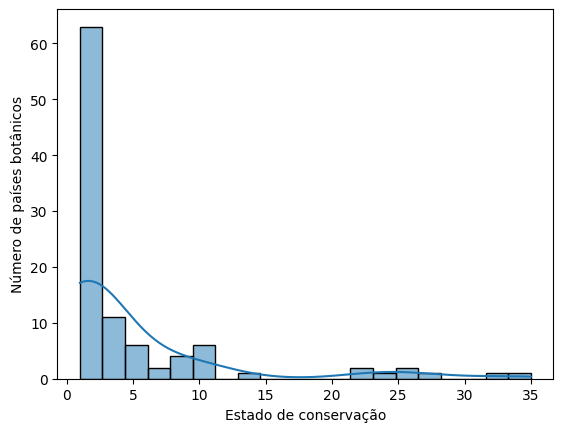

In [32]:
ax = sns.histplot(data = df, x = "region_count", kde = True)
ax.set_ylabel("Número de países botânicos")
ax.set_xlabel("Estado de conservação")
plt.savefig("output1.png")

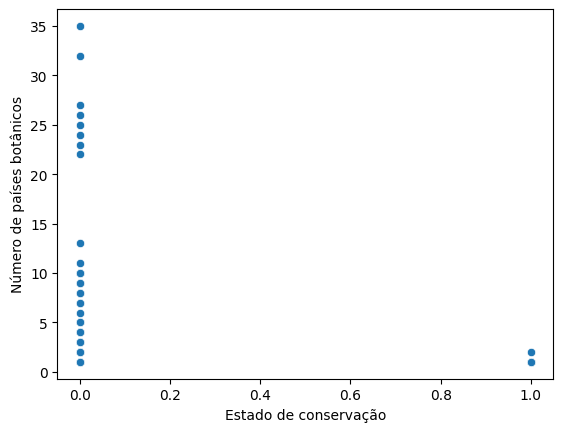

In [10]:
ax = sns.scatterplot(data = df, x = "enumRedListCategory", y = "region_count")
ax.set_ylabel("Número de países botânicos")
ax.set_xlabel("Estado de conservação")
plt.savefig("output2.png")

/home/xandao/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


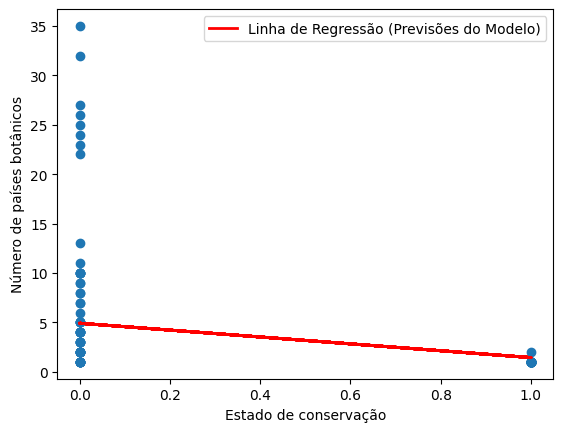

In [11]:
# Plot
plt.scatter(X, y)
plt.plot(X, reg.predict(X), linewidth=2, color="red", label = "Linha de Regressão (Previsões do Modelo)")
plt.ylabel("Número de países botânicos")
plt.xlabel("Estado de conservação")
plt.savefig("output3.png")
plt.legend()
plt.show()

In [24]:
media_nao_ameacado = df[df["enumRedListCategory"] == 0]["region_count"].mean()
std_nao_ameacado = df[df["enumRedListCategory"] == 0]["region_count"].std()
media_nao_ameacado, std_nao_ameacado

(np.float64(7.962962962962963), np.float64(8.648182190850834))

In [25]:
media_ameacado = df[df["enumRedListCategory"] == 1]["region_count"].mean()
std_ameacado = df[df["enumRedListCategory"] == 1]["region_count"].std()
media_ameacado, std_ameacado

(np.float64(1.0212765957446808), np.float64(0.14586499149789456))

In [28]:
df3 = pd.DataFrame({
    "media": [media_nao_ameacado, media_ameacado],
    "std":   [std_nao_ameacado,  std_ameacado]
},
index=["nao_ameacado", "ameacado"])
df3

,media,std
nao_ameacado,7.962963,8.648182
ameacado,1.021277,0.145865


In [12]:
X = sm.add_constant(X)

modelo = sm.OLS(y, X)

resultado = modelo.fit()

resultado.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           region_count   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     30.23
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           2.99e-07
Time:                        14:08:08   Log-Likelihood:                -328.65
No. Observations:                 101   AIC:                             661.3
Df Residuals:                      99   BIC:                             666.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.9630      0.861      9.246      0.000       6.254       9.672
enumRedListCategory    -6.9417      1.262     -5.499      0.000      -9.447      -4.437
==============================================================================
Omnibus:                       63.793   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.502
Skew:                           2.268   Prob(JB):                     5.37e-51
Kurtosis:                       8.869   Cond. No.                         2.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
coeficientes = resultado.summary2().tables[1]
coeficientes.to_csv("coeficientes.csv")
coeficientes

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,7.962963,0.861196,9.246403,4.817171e-15,6.254164,9.671762
enumRedListCategory,-6.941686,1.262448,-5.498590,2.992724e-07,-9.446658,-4.436715
